# Technical Analysis: Part 3 -- Models per State

- From unsupervised ML techniques, I was able to determine that best target variable (best because it explains the most variance of all the y-variables in dataset.
- From unsupervised ML techniques, I was able to determine that one of the best feature variables (best because it explains the most variance of all the x-variables in dataset. 
- There are still many features left in the dataset. I will analyze feature importance over feature variables using random forests in order to reduce dimensionality and find most significant feature variables to focus on.


# Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
cohort_1_w1w2 = pd.read_csv('/Users/cguy/kelstuff/ga_summer_2016/cohort_1_w1w2.csv')
cohort_1_w1w2.head()

/Users/cguy/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,9,10,11,12,16,20,23,26,29,30,31,32,33,36,38,39,40,41,43,44,45,46,51,52,53,56,59,60,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,AcSuppSv,AgeMP,AmIAKN,Asian,Baseline,BlkAfrAm,BudgetSv,CareerSv,CurrFTE,...,Sex,SpecEdSv,St,StFCID,StFIPS,SubAbuse,TribeSv,Wave,Weight,White
0,0,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450290395006,2.0,Yes,0.0,Wave 1: Age 17 Baseline Survey,1.26,1.0
1,4,0.0,17.0,1.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450448396586,2.0,No,1.0,Wave 1: Age 17 Baseline Survey,1.36,0.0
2,10,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450540097503,2.0,No,0.0,Wave 1: Age 17 Baseline Survey,1.26,1.0
3,14,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,1.0,0.0,AK,AK450652098623,2.0,No,0.0,Wave 1: Age 17 Baseline Survey,3.31,1.0
4,17,0.0,17.0,1.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,1.0,AK,AK451448406587,2.0,No,1.0,Wave 1: Age 17 Baseline Survey,1.36,0.0


In [4]:
# Seperate dataframe into feature vars and target vars

targets = cohort_1_w1w2[['CurrenRoll','HighEdCert', 'Wave']]


features = cohort_1_w1w2[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','EdLevlSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv','St','DelinqntSv','Wave']]


In [5]:
# # Create column for number of services received

services_count = features.T
services_count = services_count.drop('Wave')
services_count = services_count.drop('St')
services_count = services_count.drop('DelinqntSv')
services_count = services_count.drop('EdLevlSv')


features['Num_services'] = (services_count == 1).sum()
features.head(10)

/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,EdLevlSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv,Wave,Num_services
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,3
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,4
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2


In [8]:
features_2 = features.copy()

features_w2_stDums = features_2[features_2.Wave == "Wave 2: Age 19 Followup"]
features_w2_stDums = features_w2_stDums.drop('Wave', axis = 1)

features_w2_stDums = pd.get_dummies(features_w2_stDums)

features_w2_stDums.head()


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
features_w2_stDums.columns

Index([u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv', u'EmplyTrSv',
       u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv', u'MentorSv',
       u'EdLevlSv', u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv',
       u'DelinqntSv', u'Num_services', u'St_AK', u'St_AL', u'St_AR', u'St_AZ',
       u'St_CA', u'St_CO', u'St_DC', u'St_DE', u'St_FL', u'St_GA', u'St_IA',
       u'St_ID', u'St_IL', u'St_KS', u'St_LA', u'St_MA', u'St_MD', u'St_ME',
       u'St_MI', u'St_MN', u'St_MO', u'St_MT', u'St_NC', u'St_ND', u'St_NE',
       u'St_NH', u'St_NJ', u'St_NM', u'St_NV', u'St_NY', u'St_OH', u'St_OK',
       u'St_RI', u'St_SC', u'St_SD', u'St_UT', u'St_VA', u'St_VT', u'St_WA',
       u'St_WI', u'St_WV', u'St_WY'],
      dtype='object')

In [10]:
features_w2_stDums = features_w2_stDums.drop(['ILNAsv', 'PSEdSuppSv', 'HlthEdSv', u'FamSuppSv', u'MentorSv',\
       'SILsv', 'RmBrdFASv', 'EducFinaSv', 'OthrFinaSv','DelinqntSv'], axis = 1)
features_w2_stDums.head()

,AcSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,EdLevlSv,Num_services,St_AK,St_AL,St_AR,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7328,0.0,0.0,0.0,0.0,1.0,11.0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,0.0,0.0,0.0,0.0,0.0,11.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,0.0,0.0,0.0,0.0,0.0,11.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,0.0,0.0,0.0,0.0,0.0,11.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,0.0,0.0,0.0,0.0,0.0,11.0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

targets_w2_ = targets[targets.Wave == "Wave 2: Age 19 Followup"]
targets_w2_ = targets_w2_.drop('Wave', axis = 1)


targets_w2 = targets_w2_.copy()

for column in targets_w2:
    targets_w2[column] = le.fit_transform(targets_w2[column])
targets_w2.head()

/Users/cguy/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,CurrenRoll,HighEdCert
7328,2,7
7329,2,5
7330,3,5
7331,2,5
7332,2,5


In [12]:
# y = 0 v 1, 
    # where 1 = Vocational certificate (8), Vocational license (9), Associate's Degree (6), 
            #   Higher degree (1), Bachelor's Degree (2)
    # or 1 = when CurrenRoll == 3

def determine_Success(row):
    column_1 = 'HighEdCert'
    column_2 = 'CurrenRoll'
    if row[column_1] == 1:
        val = 1
    elif row[column_1] ==  2:
        val = 1
    elif row[column_1] ==  6:
        val = 1
    elif row[column_1] ==  9:
        val = 1
    elif row[column_1] ==  8:
        val = 1
    elif row[column_2] == 3:
        val = 1
    else:
        val = 0
    return val
    
targets_w2_final = targets_w2.copy()

targets_w2_final['Success'] = targets_w2_final.apply(determine_Success, axis=1)
targets_w2_final.head(10)



,CurrenRoll,HighEdCert,Success
7328,2,7,0
7329,2,5,0
7330,3,5,1
7331,2,5,0
7332,2,5,0
7333,3,7,1
7334,3,7,1
7335,2,5,0
7336,2,7,0
7337,3,7,1


In [13]:
targets_w2_final['Success'].value_counts()

0    4830
1    2498
Name: Success, dtype: int64

In [14]:
targets_w2_final = targets_w2_final.drop(['HighEdCert', 'CurrenRoll'], axis = 1)

In [15]:
all_in_one = pd.concat([targets_w2_final, features_w2_stDums], axis=1, join='inner')
all_in_one.head()

,Success,AcSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,EdLevlSv,Num_services,St_AK,St_AL,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7328,0,0.0,0.0,0.0,0.0,1.0,11.0,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,0,0.0,0.0,0.0,0.0,0.0,11.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1,0.0,0.0,0.0,0.0,0.0,11.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,0,0.0,0.0,0.0,0.0,0.0,11.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,0,0.0,0.0,0.0,0.0,0.0,11.0,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
all_in_one.columns

Index([u'Success', u'AcSuppSv', u'CareerSv', u'EmplyTrSv', u'BudgetSv',
       u'HousEdSv', u'EdLevlSv', u'Num_services', u'St_AK', u'St_AL', u'St_AR',
       u'St_AZ', u'St_CA', u'St_CO', u'St_DC', u'St_DE', u'St_FL', u'St_GA',
       u'St_IA', u'St_ID', u'St_IL', u'St_KS', u'St_LA', u'St_MA', u'St_MD',
       u'St_ME', u'St_MI', u'St_MN', u'St_MO', u'St_MT', u'St_NC', u'St_ND',
       u'St_NE', u'St_NH', u'St_NJ', u'St_NM', u'St_NV', u'St_NY', u'St_OH',
       u'St_OK', u'St_RI', u'St_SC', u'St_SD', u'St_UT', u'St_VA', u'St_VT',
       u'St_WA', u'St_WI', u'St_WV', u'St_WY'],
      dtype='object')

### California X

In [74]:
CAdf = all_in_one[all_in_one.St_CA == 1] 
CAdf.St_CA.value_counts()

1.0    1429
Name: St_CA, dtype: int64

### Colorado X

In [75]:
COdf = all_in_one[all_in_one.St_CO == 1] 


### Iowa X

In [76]:
IAdf = all_in_one[all_in_one.St_IA == 1] 


### Louisiana X

In [77]:
LAdf = all_in_one[all_in_one.St_LA == 1] 


### Alabama X

In [78]:
ALdf = all_in_one[all_in_one.St_AL == 1] 


In [79]:
## And a function to plot your confusion matrix:
import matplotlib.patheffects as path_effects
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', labels=['Positive','Negative'], cmap=plt.cm.Blues):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()]) #The last line here adds a text outline

In [80]:
def evaluate_model(model):
    model.fit(X, y)
    y_pred = model.predict(X)
    
    a = accuracy_score(y, y_pred)
    
    cm = confusion_matrix(y, y_pred)
    cr = classification_report(y, y_pred)
    
    print cm
    print cr
    
    return a

In [81]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for Positive Education Outcome', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

# Model

In [82]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

from sklearn.grid_search import GridSearchCV

from sklearn.cross_validation import train_test_split, KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

all_models = {}

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

In [83]:
import pickle

with open('capstone_gslr_model.pkl', 'r') as picklefile:
    gslr = pickle.load(picklefile)

In [84]:
### California

In [89]:
y = CAdf['Success']
X = CAdf.drop('Success', axis = 1)

In [90]:
X.head()

,AcSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,EdLevlSv,Num_services,St_AK,St_AL,St_AR,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7610,1.0,0.0,1.0,0.0,1.0,10.0,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,1.0,1.0,0.0,0.0,1.0,11.0,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7612,0.0,1.0,0.0,0.0,1.0,10.0,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7613,0.0,0.0,0.0,0.0,0.0,9.0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7614,1.0,1.0,1.0,0.0,1.0,10.0,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# evaluate_model(gslr)

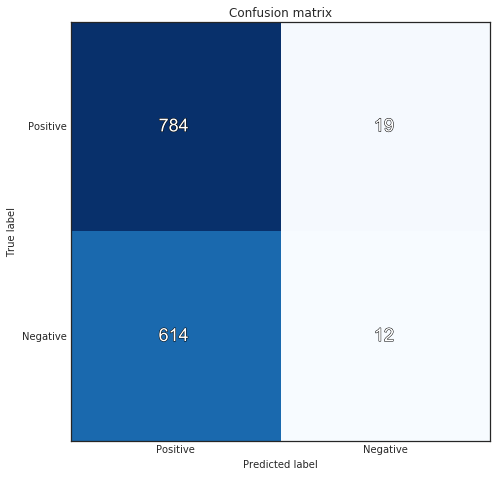

In [92]:
preds = gslr.predict(X)
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm)

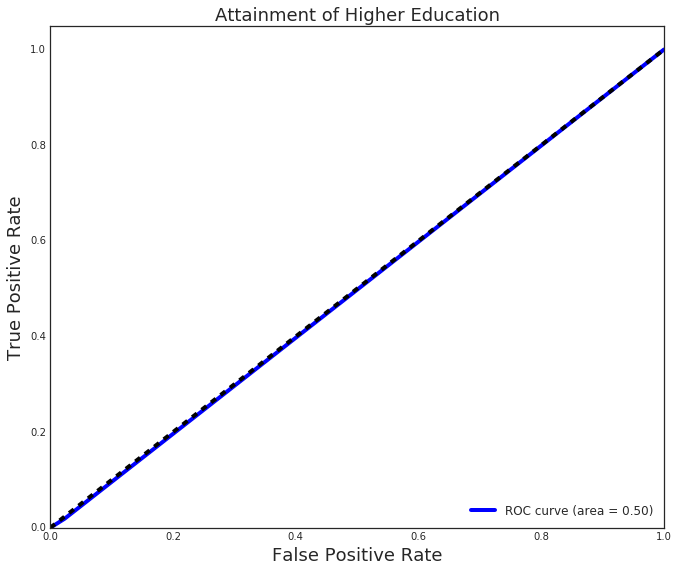

In [93]:
Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [94]:
### Colorado

In [95]:
y = COdf['Success']
X = COdf.drop('Success', axis = 1)

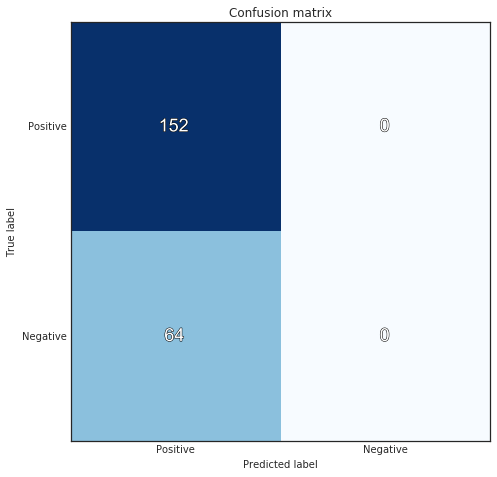

In [96]:
preds = gslr.predict(X)
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm)



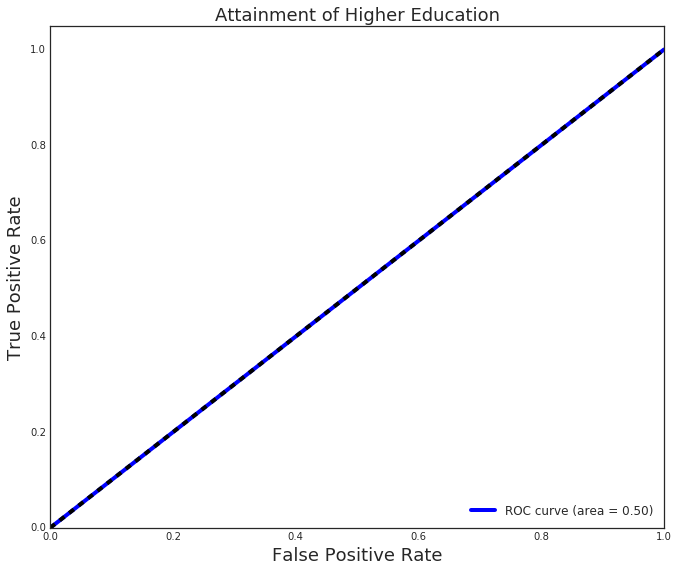

In [97]:
Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
### Iowa

In [98]:
y = IAdf['Success']
X = IAdf.drop('Success', axis = 1)

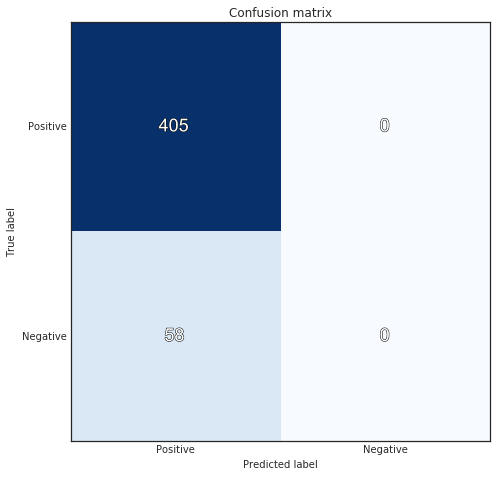

In [99]:
preds = gslr.predict(X)
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm)

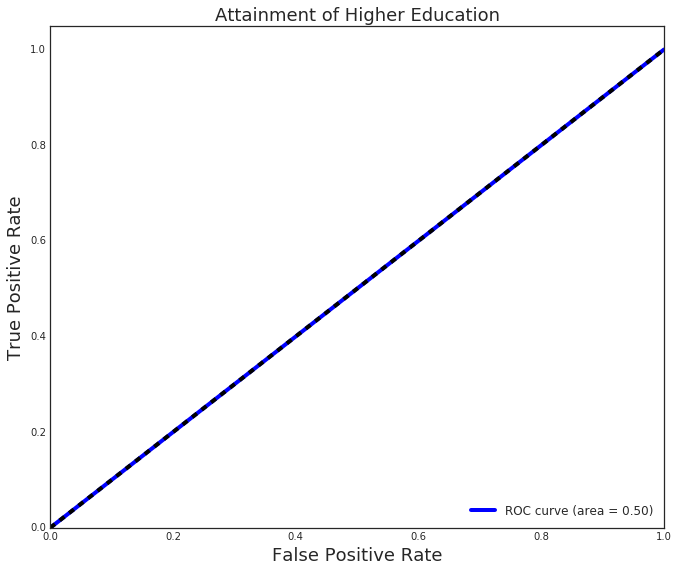

In [100]:
Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
### Louisiana

In [101]:
y = LAdf['Success']
X = LAdf.drop('Success', axis = 1)

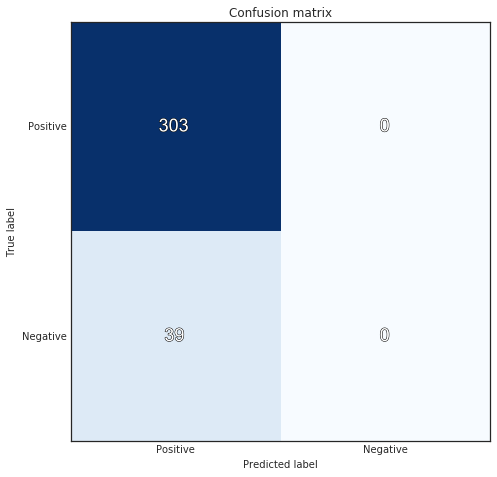

In [102]:
preds = gslr.predict(X)
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm)

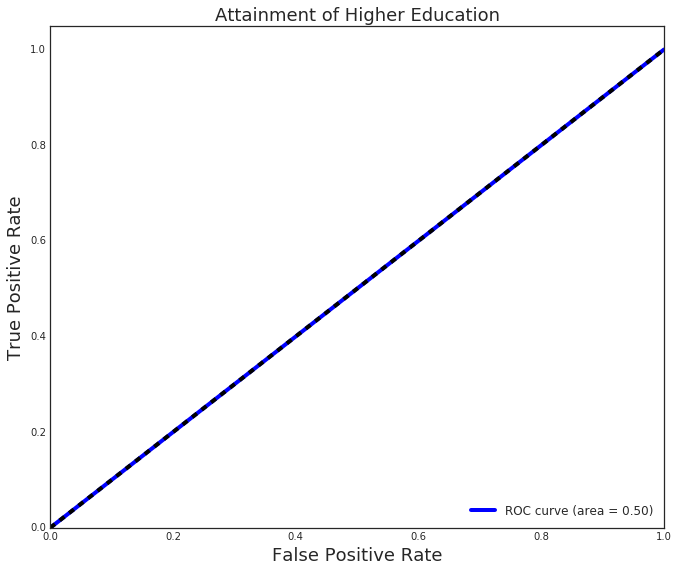

In [103]:
Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
### Alabama

In [104]:
y = ALdf['Success']
X = ALdf.drop('Success', axis = 1)

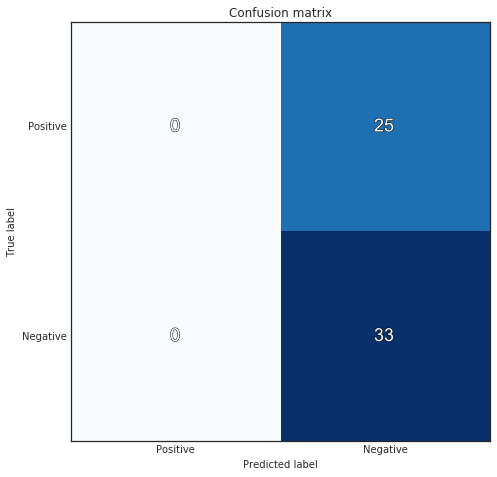

In [105]:
preds = gslr.predict(X)
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm)

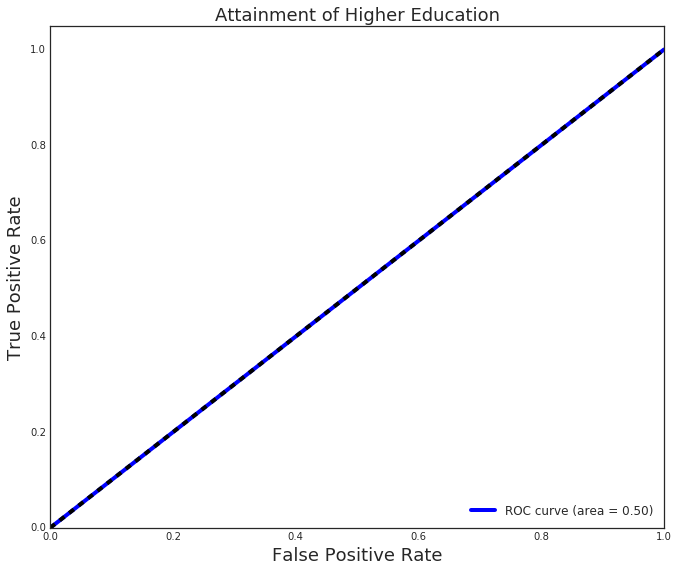

In [106]:
Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### NEXT STEPS:

- Wait for data from 2016
- Test Predictions/Validate Model